> ## **Proyecto #1: Sistema de dos ruedas bajo un potencial externo - Mecánica Analítica - Thomas A. Hernández**



In [1]:
import numpy as np
import matplotlib.pyplot as plt

Antes de empezar con el código como tal, acá al inicio defino detalles importantes de constantes en el movimiento. Esto con el objetivo de reproducir lo mejor posible los resultados presentados en el informe principal:

$$\lambda = \left(1 + \frac{a^{2}M_{T}}{I_m}\right)^{-1}$$

**Nota: Hay formas infinitamente más eficientes de hacer esto, lo sé, pero con esta me quedé :D.**

In [2]:
m, M, a, b = 1.0, 1.0, 1.0, 1.0 # Masa de una rueda (m), masa de la barra (M), radio de las ruedas (a) y semi-longitud de la barra (b).
Im = (m*(a**2))/2 # Momento de inercia de las ruedas.  
lambda_const = (1 + ((a**2)*(M + 2*m))/(Im))**(-1) # Constante del multiplicador de Lagrange lambda_2.

**1. Potencial Nulo $\left(V(x, y) = 0\right)$**: Las ecuaciones de movimiento resultantes son:

$$\left\{\begin{aligned}
    \Phi(t) & = \dot\Phi_{0}t + \Phi_{0} \\
    x(t) & = a\frac{\dot\Phi_{0}}{\dot\theta_{0}}\left[\sin(\dot\theta_{0}t + \theta_{0}) - \sin(\theta_{0})\right] + x_{0} \\
    y(t) & = a\frac{\dot\Phi_{0}}{\dot\theta_{0}}\left[\cos(\theta_{0}) - \cos(\dot\theta_{0}t + \theta_{0})\right] + y_{0}
\end{aligned}\right.$$


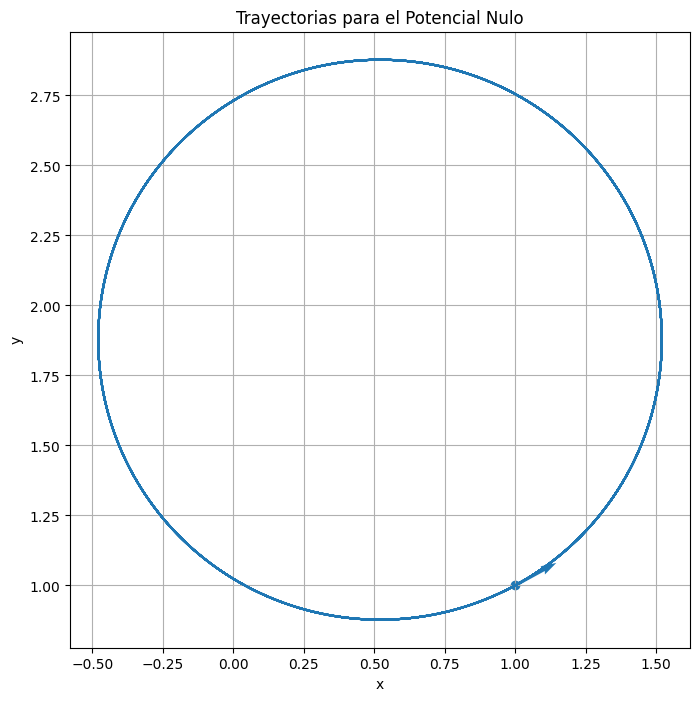

In [3]:
# Condiciones iniciales:
t1 = np.linspace(0, 60, 10000)
x_0, y_0, theta_0, dtheta_0, dPhi_0 = 1.0, 1.0, 0.5, 1.0, 1.0

# Ángulo de la dirección del movimiento:
theta_t1 = dtheta_0*t1 + theta_0

# Fase media del centro de masa:
Phi_t1 = dPhi_0*t1 + 0.0

# Posiciones x(t) y y(t):
x_t1 = a*(dPhi_0/dtheta_0)*np.sin(theta_t1) - a*(dPhi_0/dtheta_0)*np.sin(theta_0) + x_0
y_t1 = -a*(dPhi_0/dtheta_0)*np.cos(theta_t1) + a*(dPhi_0/dtheta_0)*np.cos(theta_0) + y_0

# Gráfica: ----------------------------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x_0, y_0) # Aquí el punto indica la posición inicial en el plano xy.
ax.plot(x_t1, y_t1)

# Aquí creo la flecha de la velocidad inicial para indicar el sentido de la trayectoria.
dx = x_t1[1] - x_t1[0]
dy = y_t1[1] - y_t1[0]
norm = 3*np.sqrt(dx**2 + dy**2) # No es realmente la norma, es tres veces el valor. La fecha se veía muy grande.

ax.quiver(x_0, y_0, dx/norm, dy/norm, color = "C0", angles = 'xy', scale_units = 'xy', scale = 2, width = 0.005)

ax.set_title("Trayectorias para el Potencial Nulo")
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.grid()

**2. Potencial lineal $\left(V(x, y) = -F_{0}y\right)$:** Las ecuaciones para este sistema son las siguientes:

$$\left\{\begin{align*}
    \Phi(t) & = \frac{a\lambda{F_0}}{I_{m}\dot\theta_{0}}\left[\cos(\theta_{0})t - \sin(\dot\theta_{0}t + \theta_{0}) + \sin(\theta_{0})\right] + \dot\Phi_{0}t \\
    x(t) & = x_{0} + a\left(\frac{a\lambda{F_0}\cos\theta_{0}}{I_{m}\dot\theta_{0}^2} + \frac{\dot{\Phi}_0}{\dot\theta_{0}}\right) \left[\sin(\dot\theta_{0}t + \theta_{0}) - \sin \theta_{0}\right] - \frac{a^{2}\lambda{F_0}}{2I_{m}\dot\theta_{0}} \left[t + \frac{\sin(2(\dot{\theta}_0 t + \theta_0)) - \sin(2\theta_0)}{2\dot{\theta}_0}\right] \\
    y(t) & = y_{0} - a\left(\frac{a\lambda{F_0}\cos\theta_0}{I_m\dot\theta_{0}^2} + \frac{\dot{\Phi}_0}{\dot{\theta}_0}\right)\left[\cos(\dot{\theta}_0 t + \theta_0) - \cos\theta_0 \right] + \frac{a^{2}\lambda{F_0}}{4I_m\dot\theta_{0}^2} \left[\cos(2(\dot{\theta}_0 t + \theta_0)) - \cos(2\theta_0) \right]
\end{align*}\right.$$

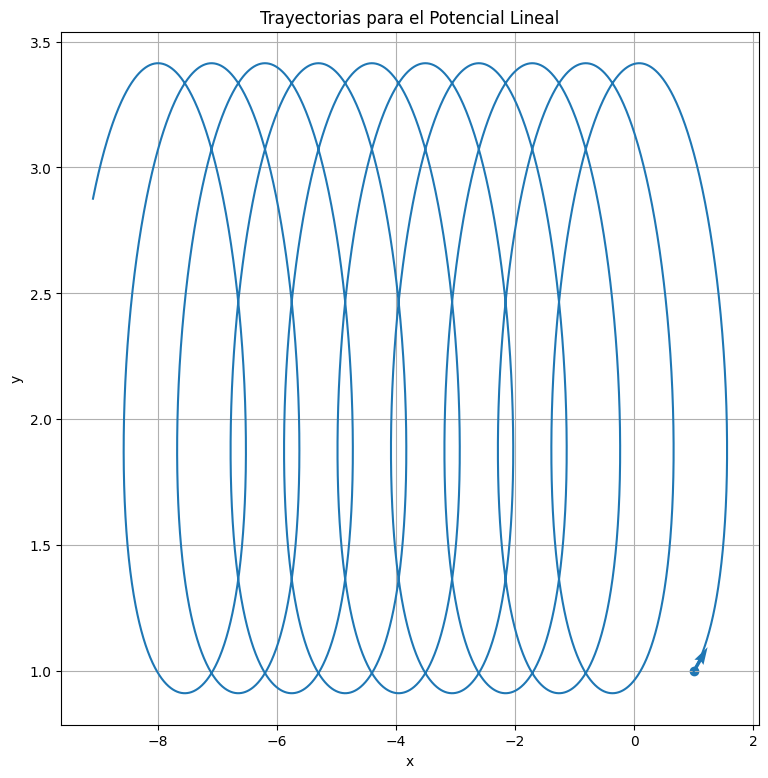

In [4]:
# Condiciones iniciales:
t2 = np.linspace(0, 60, 10000)
x_0, y_0, theta_0, dtheta_0, dPhi_0 = 1.0, 1.0, 0.5, 1.0, 1.0
theta_t2 = dtheta_0*t2 + theta_0

F0 = 1.0 # Constante del potencial.

# Definición de constantes:
c = ((a*lambda_const*F0)/(Im*(dtheta_0)))

# Fase media del centro de masa:
Phi_t2 = c*(np.cos(theta_0)*t2 - np.sin(theta_t2) + np.sin(theta_0)) + dPhi_0*t2

# Posiciones x(t) y y(t):
x_t2 = x_0 + a*((c/dtheta_0)*np.cos(theta_0) + (dPhi_0/dtheta_0))*(np.sin(theta_t2) - np.sin(theta_0)) - a*(c/2)*(t2 + ((np.sin(2*theta_t2) - np.sin(2*theta_0))/(2*dtheta_0)))
y_t2 = y_0 - a*((c/dtheta_0)*np.cos(theta_0) + (dPhi_0/dtheta_0))*(np.cos(theta_t2) - np.cos(theta_0)) + a*(c/2)*(np.cos(2*theta_t2) - np.cos(2*theta_0))

# Gráfica: -------------------------------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot(x_t2, y_t2)
ax.scatter(x_0, y_0)

# Aquí creo la flecha de la velocidad inicial para indicar el sentido de la trayectoria.
dx = x_t2[1] - x_t2[0]
dy = y_t2[1] - y_t2[0]
norm = 2*np.sqrt(dx**2 + dy**2) # No es realmente la norma, es dos veces. La fecha se veía muy grande.

ax.quiver(x_0, y_0, dx/norm, dy/norm, color = "C0", angles = 'xy', scale_units = 'xy', scale = 2, width = 0.005)

ax.set_title("Trayectorias para el Potencial Lineal")
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.grid()

**3. Potencial Armónico $\left(V(x, y) = \frac{k}{2}(x^{2} + y^{2})\right)$:** Para este caso existen dos escenarios. Dado que la solución involucra la suma de senos y cosenos con diferentes frecuencias, tenemos el escenario en el que no hay resonancia, es decir $\Omega \neq \dot\theta_{0}$:

$$\left\{\begin{align*}
    \Phi(t) & = -\frac{\ddot\Phi_{0}}{\Omega^{2}\cos(\delta)}\cos(\Omega{t} + \delta) + \left[\dot\Phi_{0} - \frac{\ddot\Phi_{0}}{\Omega}\tan(\delta)\right]t + \frac{\ddot\Phi_{0}}{\Omega^{2}} \\
    x(t) & =  x_0 + \frac{a}{\dot{\theta}_0} \left( \dot{\Phi}_0 - \frac{\ddot{\Phi}_0 \tan \delta}{\Omega} \right) \left[ \sin(\dot{\theta}_0 t + \theta_0) - \sin \theta_0 \right] + \frac{a\ddot{\Phi}_0}{2 \Omega \cos \delta} \left[ \frac{\cos(\delta + \theta_0) - \cos((\Omega + \dot{\theta}_0)t + \delta + \theta_0)}{\Omega + \dot{\theta}_0} + \frac{\cos(\delta - \theta_0) - \cos((\Omega - \dot{\theta}_0)t + \delta - \theta_0)}{\Omega - \dot{\theta}_0} \right] \\
    y(t) & =  y_0 - \frac{a}{\dot{\theta}_0} \left( \dot{\Phi}_0 - \frac{\ddot{\Phi}_0 \tan \delta}{\Omega} \right) \left[ \cos(\dot{\theta}_0 t + \theta_0) - \cos \theta_0 \right] + \frac{a\ddot{\Phi}_0}{2 \Omega \cos \delta} \left[ \frac{\sin((\Omega - \dot{\theta}_0)t + \delta - \theta_0) - \sin(\delta - \theta_0)}{\Omega - \dot{\theta}_0} - \frac{\sin((\Omega + \dot{\theta}_0)t + \delta + \theta_0) - \sin(\delta + \theta_0)}{\Omega + \dot{\theta}_0} \right],
\end{align*}\right.$$

donde $\Omega$ se define como:

$$\Omega = \sqrt{\frac{a^{2}\lambda{k}}{I_{m}} - \dot\theta_{0}}$$


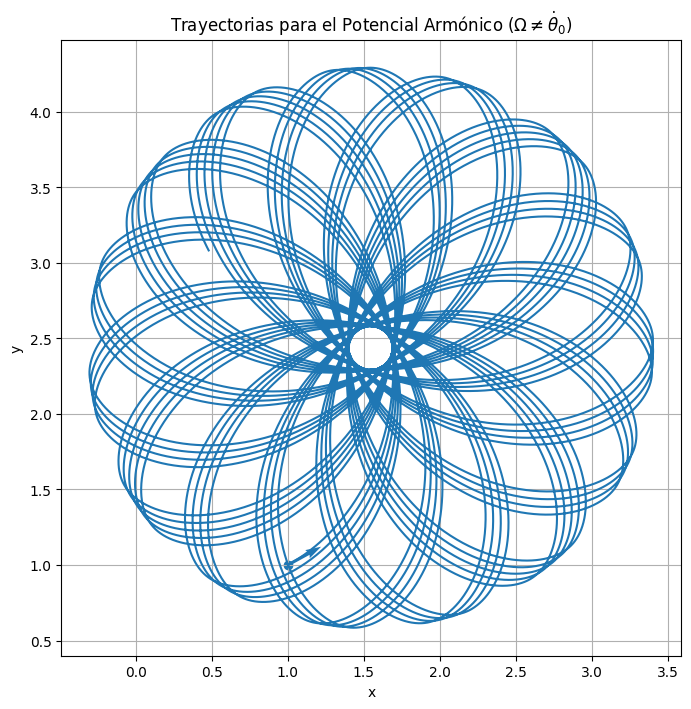

In [5]:
t3 = np.linspace(0, 300, 30000)
x_0, y_0, theta_0, dtheta_0, dPhi_0 = 1.0, 1.0, 0.5, 1.0, 1.0
theta_t3 = dtheta_0*t3 + theta_0

k = 10.0
Omega = np.sqrt(((a**2)*lambda_const*k)/Im - dtheta_0)

ddPhi_0, delta = 1.0, 0.0
x_t3 = x_0 + (a/dtheta_0)*(dPhi_0 - (ddPhi_0/Omega)*np.tan(delta))*(np.sin(theta_t3) - np.sin(theta_0)) + a*(ddPhi_0/(2*Omega*np.cos(delta)))*(((np.cos(delta + theta_0) - np.cos((Omega + dtheta_0)*t3 + delta + theta_0))/(Omega + dtheta_0)) + ((np.cos(delta - theta_0) - np.cos((Omega - dtheta_0)*t3 + delta - theta_0))/(Omega - dtheta_0)))

y_t3 = y_0 - (a/dtheta_0)*(dPhi_0 - (ddPhi_0/Omega)*np.tan(delta))*(np.cos(theta_t3) - np.cos(theta_0)) + a*(ddPhi_0/(2*Omega*np.cos(delta)))*(((np.sin((Omega - dtheta_0)*t3 + delta - theta_0) - np.sin(delta - theta_0))/(Omega - dtheta_0)) - ((np.sin((Omega + dtheta_0)*t3 + delta + theta_0) - np.sin(delta + theta_0))/(Omega + dtheta_0)))


# Gráfica: -------------------------------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x_t3, y_t3)
ax.scatter(x_0, y_0)

# Aquí creo la flecha de la velocidad inicial para indicar el sentido de la trayectoria.
dx = x_t3[1] - x_t3[0]
dy = y_t3[1] - y_t3[0]
norm = 2*np.sqrt(dx**2 + dy**2) # No es realmente la norma, es dos veces. La fecha se veía muy grande.

ax.quiver(x_0, y_0, dx/norm, dy/norm, color = "C0", angles = 'xy', scale_units = 'xy', scale = 2, width = 0.005)

ax.set_title(r"Trayectorias para el Potencial Armónico $(\Omega \neq \dot\theta_{0})$")
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.grid()

Y el caso de resonancia, es decir $\Omega = \dot\theta_{0}$:

$$\left\{\begin{align*}
    \Phi(t) & = -\frac{\ddot\Phi_{0}}{\Omega^{2}\cos(\delta)}\cos(\Omega{t} + \delta) + \left[\dot\Phi_{0} - \frac{\ddot\Phi_{0}}{\Omega}\tan(\delta)\right]t + \frac{\ddot\Phi_{0}}{\Omega^{2}} \\
    x(t) & = x_0 + \frac{a}{\dot{\theta}_0} \left( \dot{\Phi}_0 - \frac{\ddot{\Phi}_0 \tan \delta}{\dot{\theta}_0} \right) \left[ \sin(\dot{\theta}_0 t + \theta_0) - \sin \theta_0 \right] + \frac{a\ddot{\Phi}_0}{2 \dot{\theta}_0 \cos \delta} \left[ t \sin(\delta - \theta_0) + \frac{\cos(\delta + \theta_0) - \cos(2\dot{\theta}_0 t + \delta + \theta_0)}{2\dot{\theta}_0} \right] \\
    y(t) & = y_0 - \frac{a}{\dot{\theta}_0} \left( \dot{\Phi}_0 - \frac{\ddot{\Phi}_0 \tan \delta}{\dot{\theta}_0} \right) \left[ \cos(\dot{\theta}_0 t + \theta_0) - \cos \theta_0 \right] + \frac{a\ddot{\Phi}_0}{2 \dot{\theta}_0 \cos \delta} \left[ t \cos(\delta - \theta_0) - \frac{\sin(2\dot{\theta}_0 t + \delta + \theta_0) - \sin(\delta + \theta_0)}{2\dot{\theta}_0} \right]
\end{align*}\right.$$

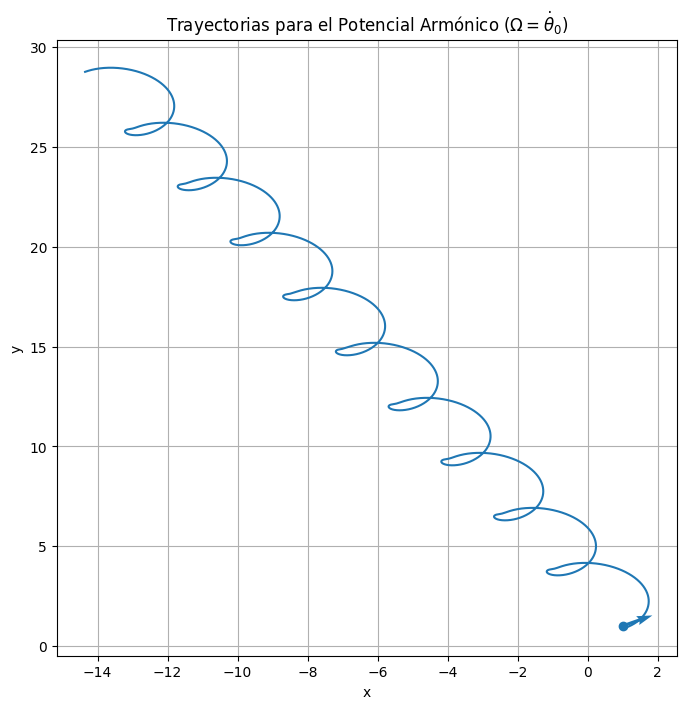

In [6]:
t4 = np.linspace(0, 60, 10000)
x_0, y_0, theta_0, dtheta_0, dPhi_0, ddPhi_0, delta = 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 0.0
theta_t4 = dtheta_0*t4 + theta_0

Omega = dtheta_0
x_t4 = x_0 + (a/dtheta_0)*(dPhi_0 - (ddPhi_0/Omega)*np.tan(delta))*(np.sin(theta_t4) - np.sin(theta_0)) + a*(ddPhi_0/(2*Omega*np.cos(delta)))*(t4*np.sin(delta - theta_0) + ((np.cos(delta + theta_0) - np.cos(2*dtheta_0*t4 + delta + dtheta_0))/(2*dtheta_0)))

y_t4 = y_0 - (a/dtheta_0)*(dPhi_0 - (ddPhi_0/Omega)*np.tan(delta))*(np.cos(theta_t4) - np.cos(theta_0)) + a*(ddPhi_0/(2*Omega*np.cos(delta)))*(t4*np.cos(delta - theta_0) + ((np.sin(delta + theta_0) - np.sin(2*dtheta_0*t4 + delta + dtheta_0))/(2*dtheta_0)))

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x_t4, y_t4)
ax.scatter(x_0, y_0)

# Aquí creo la flecha de la velocidad inicial para indicar el sentido de la trayectoria.
dx = x_t4[1] - x_t4[0]
dy = y_t4[1] - y_t4[0]
norm = 0.5*np.sqrt(dx**2 + dy**2) # No es realmente la norma, es dos veces. La fecha se veía muy pequeña.

ax.quiver(x_0, y_0, dx/norm, dy/norm, color = "C0", angles = 'xy', scale_units = 'xy', scale = 2, width = 0.005)

ax.set_title(r"Trayectorias para el Potencial Armónico $(\Omega = \dot\theta_{0})$")
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.grid()